**Loan Prediction Analysis**


Loan_ID:	Unique Loan ID

Gender:	Male/ Female

Married:	Applicant married (Y/N)

Dependents:	Number of dependents

Education:	Applicant Education (Graduate/ Under Graduate)

Self_Employed:	Self employed (Y/N)

ApplicantIncome: Applicant income

CoapplicantIncome:	Coapplicant income

LoanAmount:	Loan amount in thousands

Loan_Amount_Term:	Term of loan in months

Credit_History:	credit history meets guidelines

Property_Area:	Urban/ Semi Urban/ Rural

Loan_Status:	Loan approved (Y/N)

**Importing the Modules**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


**Loading the Dataset**

In [ ]:
df=pd.read_csv("/content/Loan Prediction Dataset.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y




*   We have to predict the output variable "Loan Status"

*   The input attributes are categorical as well as in numerical form  



**Statistics Data Information**

In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


We observe there are 13 features.

4 features are in float.1 features is in integer and the other 8 are in objects.



**Processing the Loan Sanction Data**

Now check the null values

In [ ]:
#Find the null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

6 features having null values.


**Fill the missing values for numerical terms using means**

In [ ]:
#Fill the missing values for the numerical terms using mean
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['LoanAmount'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

All the missing values will be filled with the mean of the current column

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


**Fill the missing values for categorical terms by mode operation**

In [ ]:
#Fill the missing values for categorical terms-mode
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])


In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


All the missing values will be filled with the most frequently occurring values.
Modes give the result in their terms of the data frame, so we only need the values. We will specify 0th index to display the values

**Now let us check the null values again**

In [ ]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

All the null values have been replaced

**Exploratory Data Analysis**

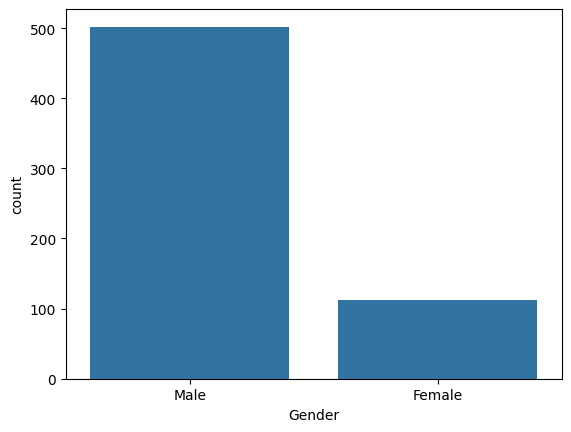

In [ ]:
#Categorical Attributes Visualization
sns.countplot(x='Gender',data=df)
plt.xlabel('Gender')
plt.ylabel('count')
plt.show()

The majority of the application are male and a handful is female.


**To display the column "MARRIED"**

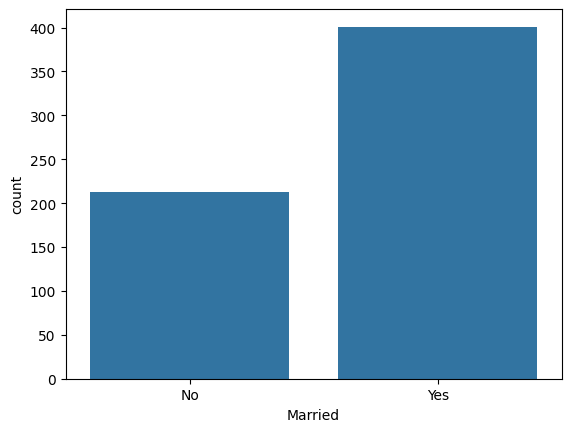

In [ ]:
sns.countplot(x="Married",data=df)
plt.xlabel('Married')
plt.ylabel('count')
plt.show()

Majority of the applicants are married

**To display dependents**

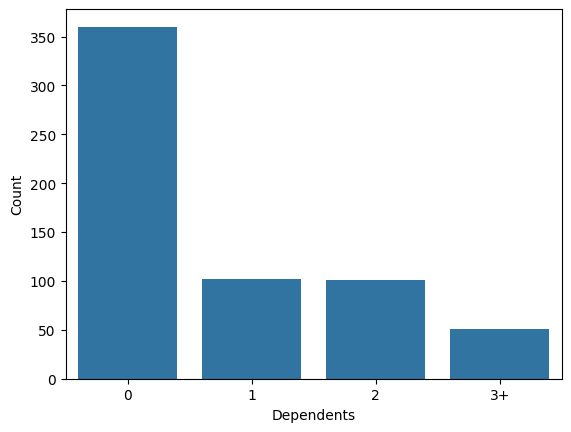

In [ ]:
sns.countplot(x="Dependents",data=df)
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.show()


The majority of the applicants have zero dependents,around 100 applicants have one or two dependents and only a few have more than three dependents

**To display the column Education**

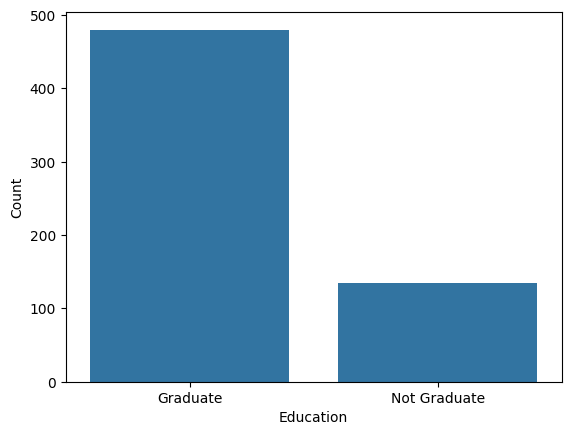

In [ ]:
sns.countplot(x='Education',data=df)
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

**To display the column "Self Employed**

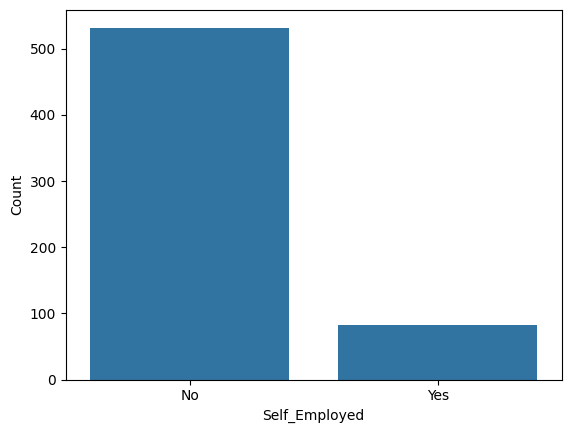

In [ ]:
sns.countplot(x='Self_Employed',data=df)
plt.xlabel('Self_Employed')
plt.ylabel('Count')
plt.show()

Around 90 applicants are either freelancers or run a business

**To display Property Area**

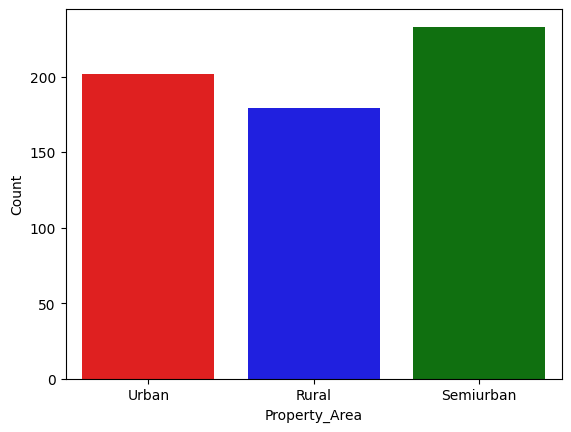

In [ ]:
# palette = sns.color_palette("husl", 3)
sns.countplot(x='Property_Area',data=df,palette=['red','blue','green'])
plt.xlabel('Property_Area')
plt.ylabel('Count')
plt.show()

The applicants are equally distributed in urban, rural and semi-urban areas  

**Display the Loan Status**

<Axes: xlabel='Loan_Status', ylabel='count'>

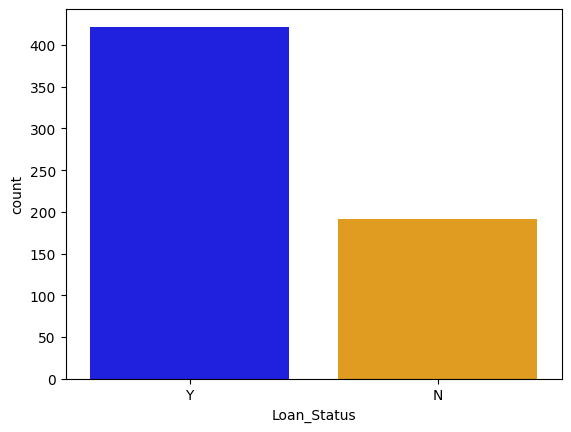

In [ ]:
sns.countplot(x='Loan_Status',data=df,palette=['blue','orange'])

Around 400 loans are accepted and 200 loans are rejected.Its shows the 2:1

**Numerical Column of "Applicant Income**

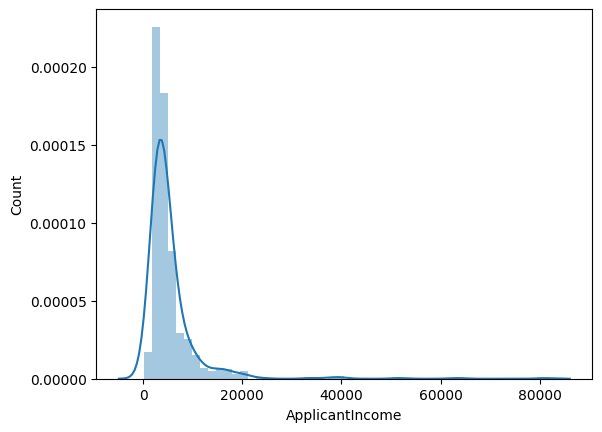

In [ ]:
#Numerical Atrributes visualization
sns.distplot(df['ApplicantIncome'])
plt.xlabel('ApplicantIncome')
plt.ylabel('Count')
plt.show()

The data are skewed left left in the graph, which is not a suitable distribution to train a Model.


Hence, we will apply the Log Transformation later to normalize the attributes in the form of Bell Curve (Normal Distribution)

<Axes: xlabel='ApplicantIncome', ylabel='Density'>

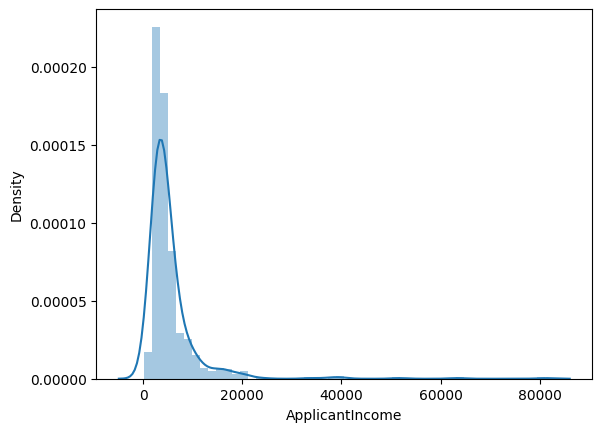

In [ ]:
sns.distplot(df["ApplicantIncome"])


We have to normalize this graph as well

**Display the Loan Amount**

<Axes: xlabel='LoanAmount', ylabel='Density'>

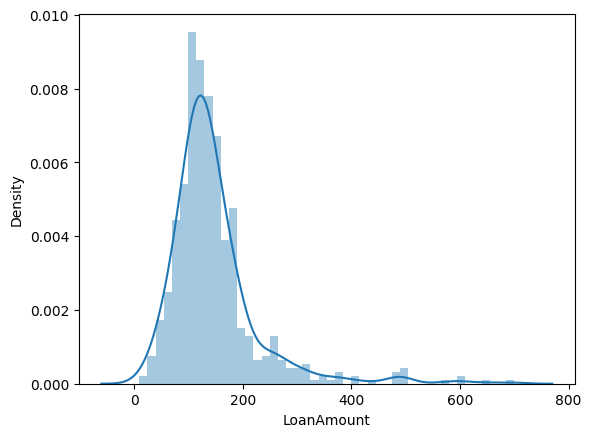

In [ ]:
sns.distplot(df['LoanAmount'])

This loan amount graph is slightly right skewed.We will consider this  for Normalization.

**To display the column "Loan Amount Term**

<Axes: xlabel='Loan_Amount_Term'>

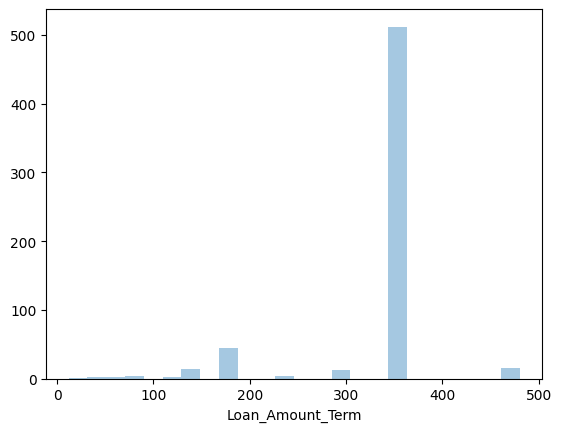

In [ ]:
sns.distplot(df['Loan_Amount_Term'],kde=False)

we will apply log transformation of this as well.

**To display the column "Credit History"**

<Axes: xlabel='Credit_History'>

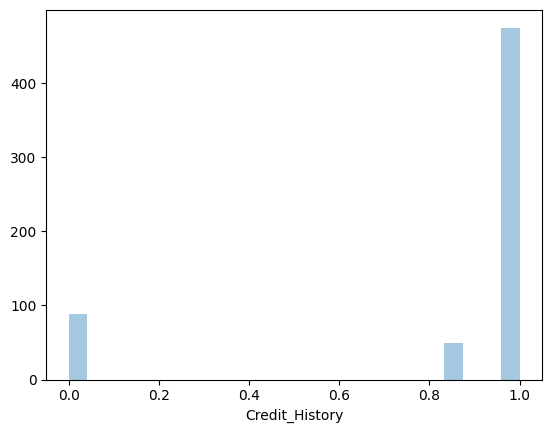

In [ ]:
sns.distplot(df['Credit_History'],kde=False)

**Creation of New attributes**

In [ ]:
# We can create a new attributes performing Log Transformation.We can also create a new attribute TOTAL INCOME , that is the sum of Applicant Income and Co-applicantIncome
#Total_Income
df['Total_Income']=df['ApplicantIncome']+df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


**Log Transformation**
Log transformation helps us to make higly skewed distribution to less skewed.Instead of Changing column we will add the data into a new column by writting log after each column.

**To display the new columnn "Applicant Income Log**

<Axes: xlabel='ApplicantIncomeLog', ylabel='Density'>

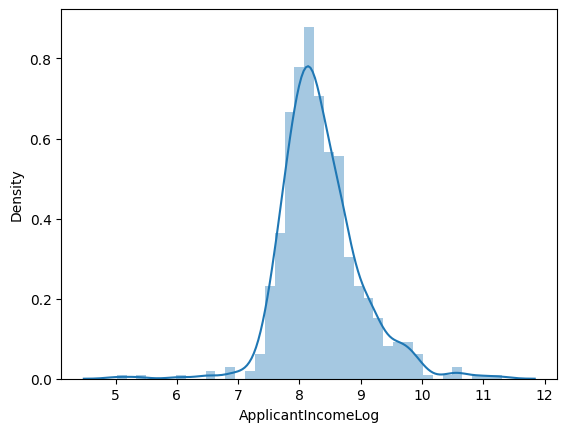

In [ ]:
#Apply Log Transformation to the attribute
df['ApplicantIncomeLog']=np.log(df['ApplicantIncome']+1)
sns.distplot(df['ApplicantIncomeLog'])


We can observe Normal Distribution in a form of Bell Curve

**To Display the column "Co-Applicant Income Log"**

<Axes: xlabel='CoapplicantIncomeLog', ylabel='Density'>

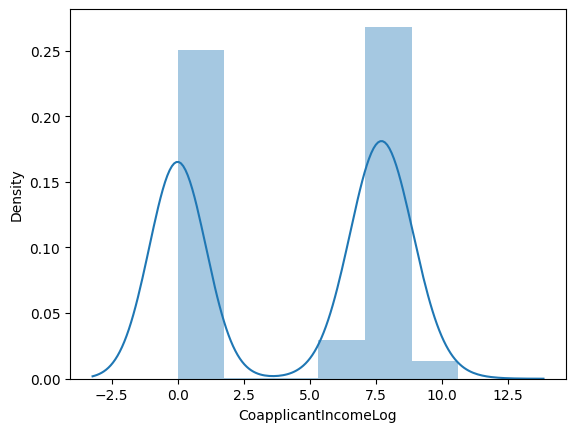

In [ ]:
df['CoapplicantIncomeLog']=np.log(df['CoapplicantIncome']+1)
sns.distplot(df['CoapplicantIncomeLog'])

**To display the column "Loan Amount Log**

<Axes: xlabel='LoanAmountLog', ylabel='Density'>

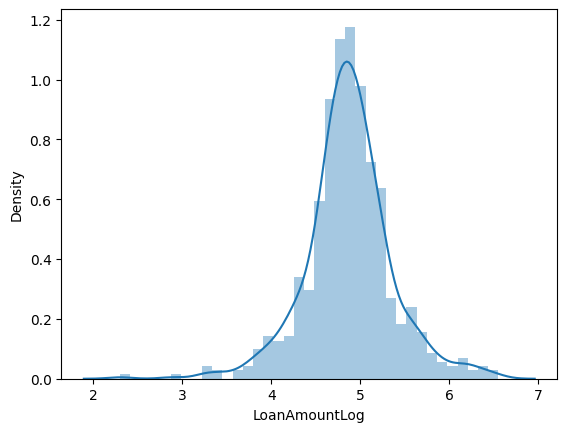

In [ ]:
df['LoanAmountLog']=np.log(df['LoanAmount']+1)
sns.distplot(df["LoanAmountLog"])

**To Display the column "Loan Amount Term Log"**

<Axes: xlabel='LoanAmountTermLog', ylabel='Density'>

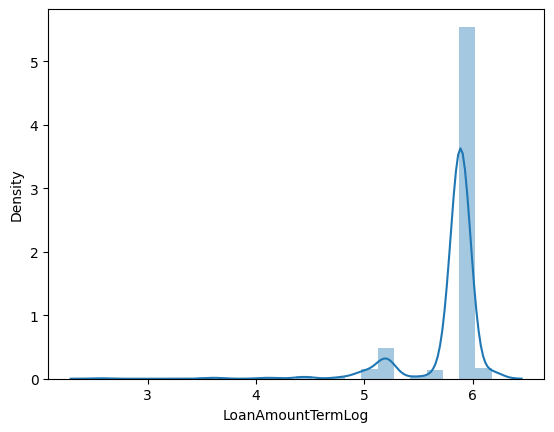

In [ ]:
df['LoanAmountTermLog']=np.log(df['Loan_Amount_Term']+1)
sns.distplot(df['LoanAmountTermLog'])


The Loan amount Term is slightly better than before.Despite the fact that it is skewed right

**To display the column "Total Income Log"**

<Axes: xlabel='Total_Income_Log', ylabel='Density'>

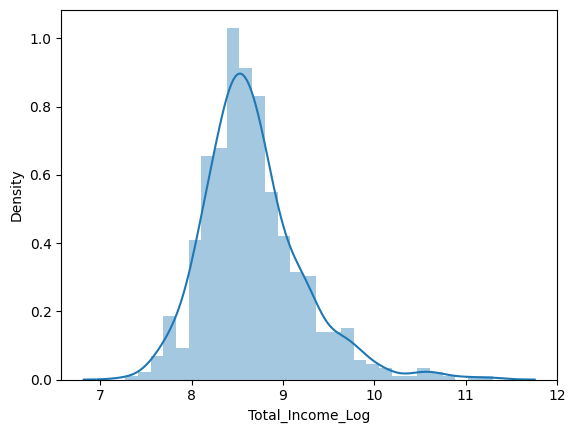

In [ ]:
df['Total_Income_Log']=np.log(df['Total_Income']+1)
sns.distplot(df['Total_Income_Log'])

We can observe the normal distribution of the newly created column 'Total Income'.After normalizing all the data in the dataset,lets check the correlation

**Correlation Matrix**

<Axes: >

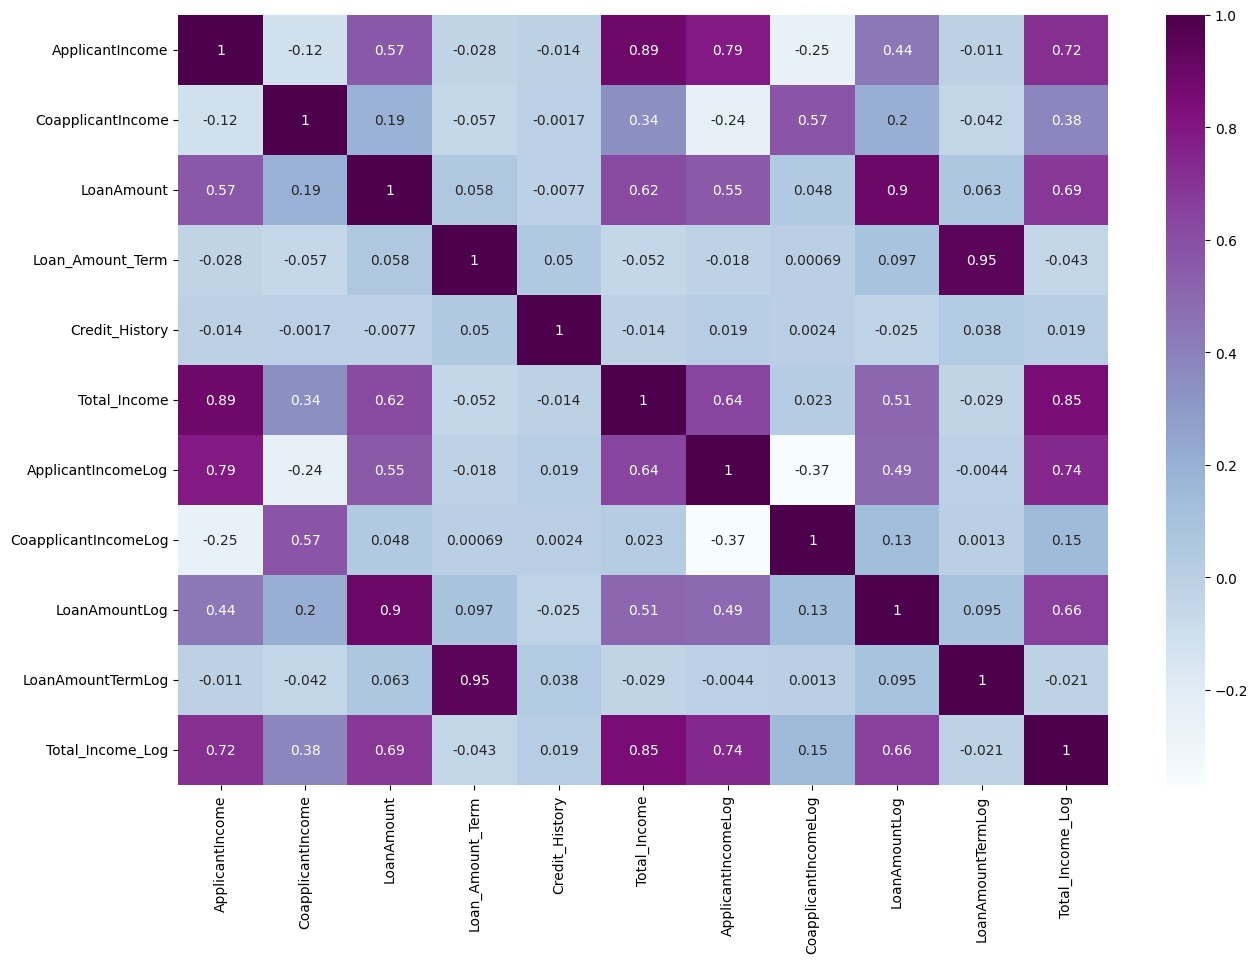

In [ ]:
corr=df.corr(numeric_only=True)
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True ,cmap='BuPu')

In this graph, the higher density is plotted with dark color and the lower density is plotted with light color.

We need to remove the highly correlated attributes.

It means the original attributes are correlated with log attributes.

We will remove the previous attributes and keep the log attributes to train our model

**To check values of Dataset**

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,LoanAmountTermLog,Total_Income_Log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674197,0.000000,4.993232,5.888878,8.674197
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.430327,7.319202,4.859812,5.888878,8.714732
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006701,0.000000,4.204693,5.888878,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,7.857094,7.765993,4.795791,5.888878,8.505525
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699681,0.000000,4.955827,5.888878,8.699681


**Let us drop some unnecessary columns**

In [ ]:
cols=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Total_Income','Loan_ID','CoapplicantIncomeLog']
df=df.drop(columns=cols,axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,LoanAmountTermLog,Total_Income_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674197,4.993232,5.888878,8.674197
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430327,4.859812,5.888878,8.714732
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006701,4.204693,5.888878,8.006701
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.857094,4.795791,5.888878,8.505525
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699681,4.955827,5.888878,8.699681


Out of all previous columns we will keep credit history and dropping all others columns.

**Label Encoding**
Label encoding converts categorical values into numerical values. For example, if you have colors like "Red", "Green", and "Blue", label encoding will turn them into numbers like 0, 1, and 2.

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status',"Dependents"]
le=LabelEncoder()
for col in cols:
  df[col]=le.fit_transform(df[col])

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,LoanAmountTermLog,Total_Income_Log
0,1,0,0,0,0,1.0,2,1,8.674197,4.993232,5.888878,8.674197
1,1,1,1,0,0,1.0,0,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,1,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,1,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,1,8.699681,4.955827,5.888878,8.699681


All the values of the dataset are now in numerical format.It will help us to train our model easily.

For loan status 1 indicates "Yes" and 0 means "No"



**Splitting the data for the Training and Testing**

In [ ]:
#Specify the input and output attributes
X=df.drop(columns=['Loan_Status'],axis=1)
Y=df['Loan_Status']


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

We will add random_state with the attribute 42 to get same split upon re-rerunning

If you don't specify random_state it will randomly split the data upon re-running giving inconsistent results.

**Model Training**

In [ ]:
#classify function
from sklearn.model_selection import cross_val_score
def classify(model,x,y):
  x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)
  model.fit(x_train,y_train)
  print("Accuracy is ",model.score(x_test,y_test)*100)
  #Cross validation:Uses cross-validation to evaluate the model's performance. It divides the entire dataset (x, y) into multiple folds (5 in this case), trains and tests the model on these different folds, and then averages the results.
  #eg.cv-5,train-4,test-1
  score=cross_val_score(model,x,y,cv=5)
  print("Cross validation is",np.mean(score)*100)

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
classify(model,X,Y)

Accuracy is  77.27272727272727
Cross validation is 80.9462881514061


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
y_pred = model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)
cm = confusion_matrix(y_test, y_pred)
cm



0.7727272727272727


array([[21, 33],
       [ 2, 98]])